In [1]:
import CCI_Collective.cci_collective as cc 
from CCI_Collective.utils.matrix_operations import *
import numpy as np
import pandas as pd
from scanpy import read_h5ad

In [2]:
adata = read_h5ad('../.data/Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

## Downsampling (optional)

In [3]:
num_cells_to_keep = 1000
np.random.seed(42)  # for reproducibility
cells_to_keep = np.random.choice(adata.obs_names, size=num_cells_to_keep, replace=False)
adata = adata[cells_to_keep, :]
adata

View of AnnData object with n_obs × n_vars = 1000 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [4]:
test = cc.cci_collective(adata)
test.adata

View of AnnData object with n_obs × n_vars = 1000 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'

In [5]:
df = test.build_features('cell_states', accelerator='gpu', device=0)
df


selected device 0


100%|██████████| 1000/1000 [00:07<00:00, 138.12it/s]


,KRT14+Goblet,NOTCH3+SupraB,iav_Goblet,MKI67+pBasal,IGFBP+Basal,FB-like_Basal,mixed_Goblet1,KRT14+AQP1+Secretory,CCDC3+Basal1,SCGB1A1+Goblet,...,SCGB1+KRT5-FOXA1+iav_Club,SERPINE1+Basal,MHCII+Club,IGFBP6+Basal,RARRES1+lip_Goblet,iavAPC_Epi,KRT16+SupraB,TCN1+Club,APOD+Ciliated,ifn_Goblet
360920-ST09_CSE_IAV-V1,3765034.0,5153847.0,1291660.0,4766390.0,2885009.0,6479879.0,1426877.0,1436723.0,3358298.0,886807.0,...,183908.0,1239611.0,1943101.0,346875.0,310736.0,295087.0,270970.0,343200.0,208817.0,212304.0
14519-ST09_CSE_IAV-V1,1769788.0,2263098.0,583448.0,2106160.0,1266475.0,2904185.0,620493.0,680998.0,1488352.0,420382.0,...,84771.0,565413.0,795032.0,159531.0,133731.0,118820.0,111359.0,180680.0,90661.0,86806.0
3553628-GER12_IAV-V5,1658111.0,2171041.0,574279.0,1899178.0,1194939.0,2705779.0,673821.0,599623.0,1425760.0,378473.0,...,74360.0,469911.0,836169.0,150583.0,136896.0,136562.0,103700.0,154838.0,105693.0,75364.0
2094003-GER14_IAV-V3,2862483.0,4702500.0,1006963.0,4297405.0,2631759.0,5843953.0,1061876.0,1210731.0,3057614.0,686487.0,...,146738.0,1124761.0,1221255.0,310601.0,220916.0,182182.0,226535.0,263860.0,140353.0,170421.0
340559-ST09_CSE_IAV-V1,1148901.0,1775285.0,389464.0,1660203.0,1110274.0,2564474.0,386115.0,453495.0,1271645.0,264449.0,...,59688.0,465601.0,497936.0,115326.0,89006.0,60339.0,91513.0,95054.0,49765.0,77054.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8875434-GER12_CTRL-V5,2149558.0,3307652.0,771490.0,2811862.0,1773860.0,3951166.0,837388.0,879581.0,2056652.0,529138.0,...,111577.0,751673.0,1112219.0,209538.0,185086.0,161430.0,159452.0,213199.0,119548.0,127700.0
11215920-CSE03_CTRL-V6,3712415.0,5843816.0,1319668.0,5274847.0,2875958.0,6151495.0,1434345.0,1511521.0,3349910.0,906585.0,...,234247.0,1533786.0,2488185.0,357208.0,345407.0,289402.0,338882.0,388161.0,209954.0,318795.0
7986090-CSE03_IAV-V6,1669392.0,2223722.0,575956.0,2118693.0,1411108.0,3291204.0,614529.0,621582.0,1684331.0,381362.0,...,79405.0,569523.0,719013.0,154695.0,131594.0,103984.0,105140.0,156219.0,85834.0,83724.0
538252-ST07_CSE_CTRL-V1,1344158.0,2241290.0,467374.0,2128647.0,1216903.0,2677167.0,502370.0,559490.0,1490542.0,310805.0,...,73812.0,562644.0,715259.0,136444.0,112419.0,88882.0,113147.0,139082.0,66384.0,91518.0


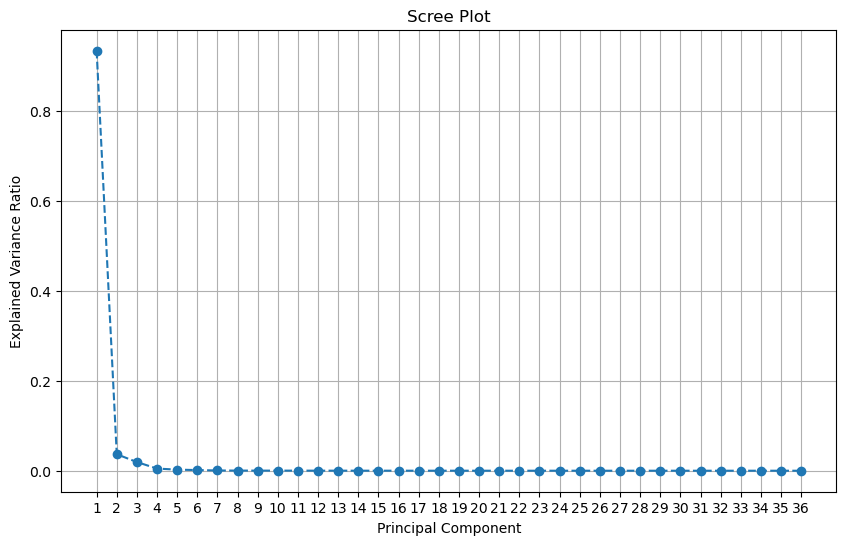

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Get the principal components
pcs = pca.components_

# Visualize explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

# Optionally, you can also transform the data to the PCA space
data_pca = pca.transform(data_scaled)

/tmp/ipykernel_933665/783965923.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_categories = {cell: adata[adata.obs_names == cell].obs['group'][-1] for cell in adata.obs_names}


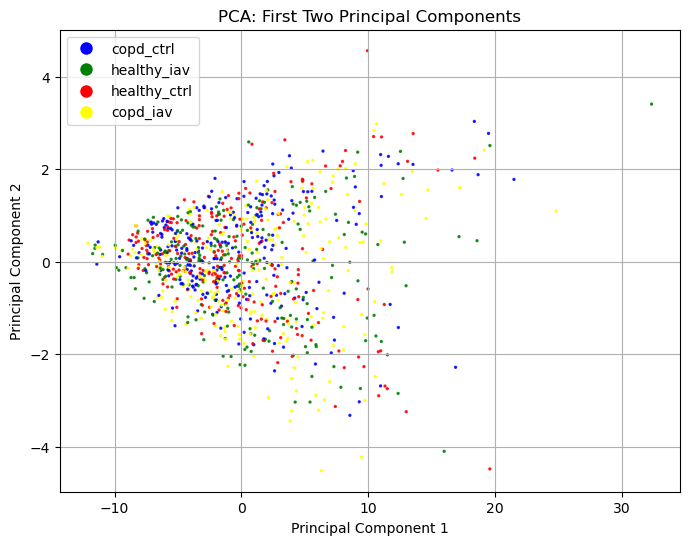

In [7]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
data_pca = pca.fit_transform(data_scaled)

# Example dictionary mapping sample names to categories
sample_categories = {cell: adata[adata.obs_names == cell].obs['group'][-1] for cell in adata.obs_names}

# Example dictionary mapping categories to colors
category_colors = {
    'copd_ctrl': 'blue',
    'healthy_iav': 'green',
    'healthy_ctrl': 'red',
    'copd_iav': 'yellow'
    # Add more categories and corresponding colors as needed
}

# Assign colors to each data point based on its category
colors = [category_colors[sample_categories[sample]] for sample in df.index]

# Create a scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=colors, s=2, alpha=0.8)  # Set 's' to a smaller value to reduce marker size

# Customize plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.grid(True)

# Create a legend based on category colors
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color, markersize=10)
                   for category, color in category_colors.items()]
plt.legend(handles=legend_elements)

plt.show()

In [8]:
import cupy as cp

In [9]:
cp.cuda.get_device_id()

0

In [10]:
import cupy as cp

def get_available_devices():
    num_devices = cp.cuda.runtime.getDeviceCount()
    devices = []
    for device_id in range(num_devices):
        device_properties = cp.cuda.runtime.getDeviceProperties(device_id)
        devices.append({
            "Device ID": device_id,
            "Name": device_properties["name"],
            "Total Memory (MB)": device_properties["totalGlobalMem"] / (1024 ** 2),
            "Multiprocessors": device_properties["multiProcessorCount"],
            "Compute Capability": f"{device_properties['major']}.{device_properties['minor']}"
        })
    return devices

# Example usage
devices_info = get_available_devices()
for device in devices_info:
    print(device)

{'Device ID': 0, 'Name': b'NVIDIA RTX 6000 Ada Generation', 'Total Memory (MB)': 48546.125, 'Multiprocessors': 142, 'Compute Capability': '8.9'}
{'Device ID': 1, 'Name': b'NVIDIA RTX 6000 Ada Generation', 'Total Memory (MB)': 48546.125, 'Multiprocessors': 142, 'Compute Capability': '8.9'}


In [11]:
devices_info

[{'Device ID': 0,
  'Name': b'NVIDIA RTX 6000 Ada Generation',
  'Total Memory (MB)': 48546.125,
  'Multiprocessors': 142,
  'Compute Capability': '8.9'},
 {'Device ID': 1,
  'Name': b'NVIDIA RTX 6000 Ada Generation',
  'Total Memory (MB)': 48546.125,
  'Multiprocessors': 142,
  'Compute Capability': '8.9'}]

In [12]:
device['Device ID']

1